In [10]:
import time
from pathlib import Path

import cv2
import torch
from numpy import random
import numpy as np

from models.experimental import attempt_load
from utils.datasets import letterbox
from utils.general import non_max_suppression
from utils.plots import plot_one_box

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
model = attempt_load('weights/yolov7.pt',map_location='cpu')

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block


In [12]:
model = attempt_load('../yolov7/yolov7-tiny.pt',map_location='cpu')

Fusing layers... 


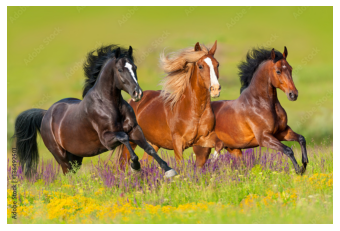

In [13]:
img = cv2.imread('horses.jpg')[:,:,::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
%%time
img = cv2.imread('horses.jpg')
stride = int(model.stride.max())
img_size = 320
ratio = img.shape[1] / img_size
img = letterbox(img, img_size, stride=stride)[0]
img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
img = np.ascontiguousarray(img)
img_t = torch.from_numpy(img).to('cpu').float()
img_t /= 255.0  # 0 - 255 to 0.0 - 1.0
if img_t.ndimension() == 3:
    img_t = img_t.unsqueeze(0)
out = model(img_t, augment=False)[0]

CPU times: user 80.4 ms, sys: 35.5 ms, total: 116 ms
Wall time: 125 ms


In [15]:
stride

32

In [16]:
%%timeit
out = model(img_t, augment=False)[0]

57.6 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
out = non_max_suppression(out, 0.25, 0.45, classes=None, agnostic=None)

In [18]:
out = out[0].detach().numpy()

In [19]:
names = model.module.names if hasattr(model, 'module') else model.names
colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]

In [22]:
import pickle

with open('names.pickle', 'wb') as f:
    pickle.dump(names, f)

In [21]:
%time
im0 = cv2.imread('horses.jpg')[:,:,::-1] / 1.
for *xyxy, conf, cls in out:
    label = f'{names[int(cls)]} {conf:.2f}'
    plot_one_box(xyxy, im0, label=label, color=colors[int(cls)], line_thickness=3, ratio=ratio)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


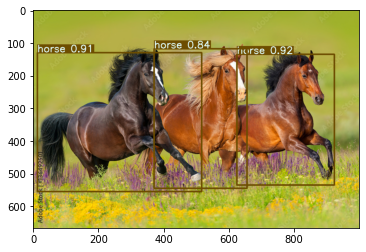

In [22]:
plt.imshow(im0.astype('uint8'))

In [25]:
names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']